In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [9]:
metadata_path = './HAM10000_metadata.csv'

In [29]:
df = pd.read_csv(metadata_path)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [35]:
df.shape
(df.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [39]:
class_counts = df['dx'].value_counts()
print(class_counts)

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

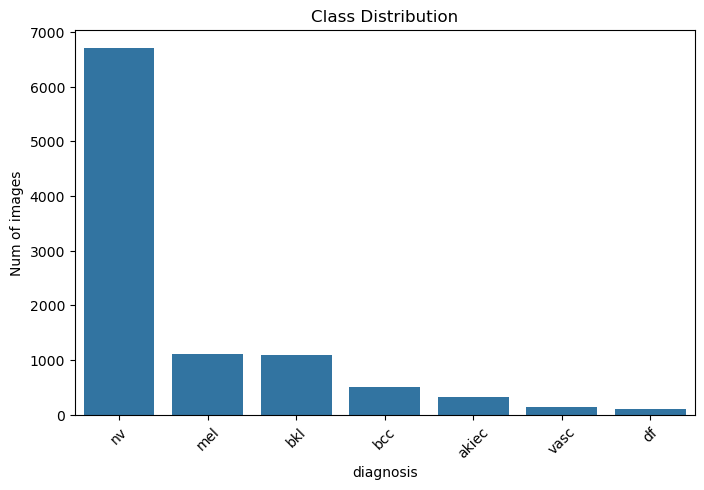

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='dx', order=df['dx'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('diagnosis')
plt.ylabel('Num of images')
plt.xticks(rotation=45)
plt.show


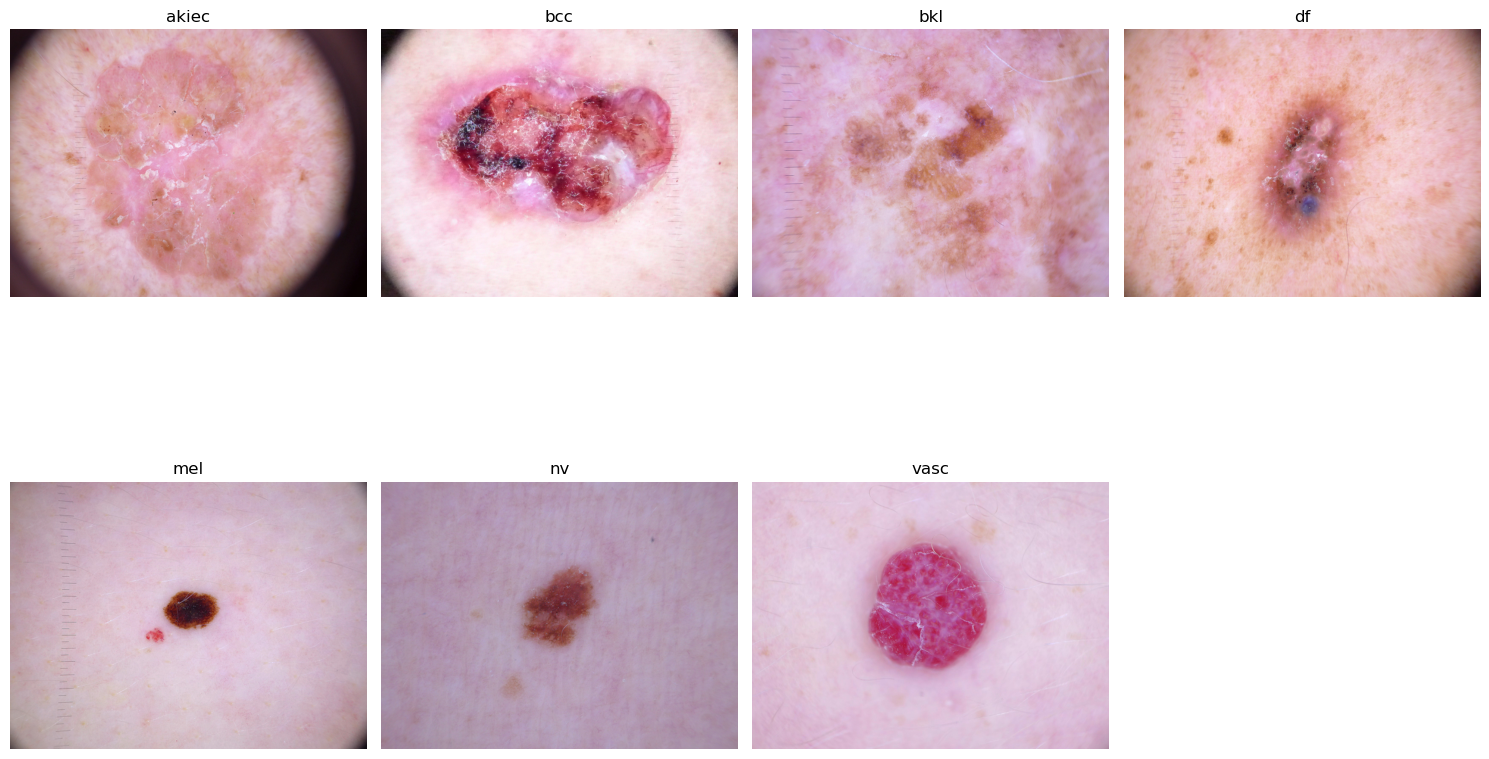

In [51]:
image_folder = './images/'
sample_images = df.groupby('dx').first().reset_index()
plt.figure(figsize=(15,10))

for i, row in sample_images.iterrows():
    img_path = os.path.join(image_folder, row['image_id'] + '.jpg')
    img = Image.open(img_path)
    
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(row['dx'])
    plt.axis('off')

plt.tight_layout()
plt.show()